In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.radial_ee import analyze

In [16]:
# selected_idx = [c for c in first.index
#                 if 'irrigation_eff' in c.lower() or 'irrigated_winter_wheat___yield_per_ha' in c.lower()]

def incremental_radialee_analysis(lower, upper, step=1):
    # cols = ['$\mu*$', '$\sigma$']
    res, idx = [], []
    for reps in range(lower, upper, step):
        results = analyze(CIM_SPEC, numeric_vals[:reps], np_res[:reps], int(reps/step), seed=101)
        total = results.to_df()
        
        # total = total.rename({'mu_star': '$\mu*$', 'sigma': '$\sigma$'})

        # res.append(total.loc[tgt_param, cols])
        res.append(total.loc[tgt_param, ['mu_star', 'sigma']].tolist())
        idx.append(int(reps/step))
    # End for
    
    return res, idx
# End incremental_radialee_analysis()

In [17]:
### With more samples...

numeric_samples = pd.read_csv(f'{DATA_DIR}oat_mc_10_numeric_samples.csv', index_col=0)
numeric_samples = numeric_samples[perturbed_cols]
numeric_vals = numeric_samples.values

In [18]:
cols = ['$\mu*$', '$\sigma$']

# Coupling disabled
# radial_no_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_no_irrigation_10_results.csv', index_col=0)
radial_no_irrigation_results = pd.read_csv(f'{DATA_DIR}oat_no_irrigation_10_results.csv', index_col=0)
radial_no_irrigation_results['Avg. $/ML'].fillna(radial_no_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

tgt_result_idx = radial_no_irrigation_results.columns.tolist().index(tgt_metric)

np_res = radial_no_irrigation_results.values[:, tgt_result_idx]
runs = np_res.shape[0]
res, idx = incremental_radialee_analysis(54, runs, 54)

In [19]:
disabled = pd.DataFrame(data=res, columns=cols, index=idx)

In [20]:
# Coupling enabled
# radial_with_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_with_irrigation_10_results.csv', index_col=0)
radial_with_irrigation_results = pd.read_csv(f'{DATA_DIR}oat_with_irrigation_10_results.csv', index_col=0)
radial_with_irrigation_results['Avg. $/ML'].fillna(radial_with_irrigation_results["Avg. Annual Profit ($M)"], inplace=True)

tgt_result_idx = radial_with_irrigation_results.columns.tolist().index(tgt_metric)
np_res = radial_with_irrigation_results.values[:, tgt_result_idx]

runs = np_res.shape[0]

res, idx = incremental_radialee_analysis(54, runs+54, 54)

In [21]:
# plot_incremental_results(res, idx)
enabled = pd.DataFrame(data=res, columns=cols, index=idx)

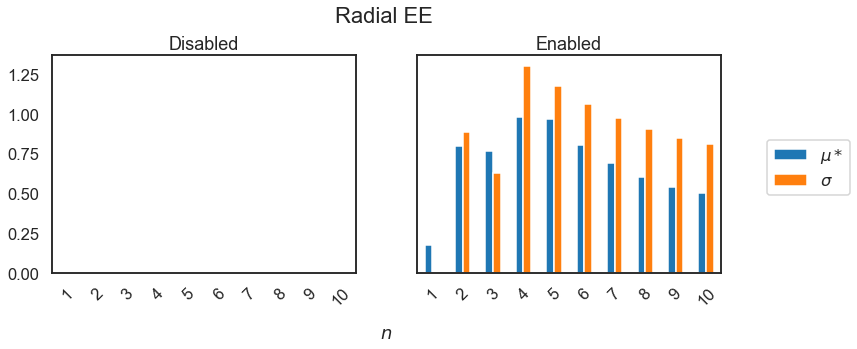

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)

disabled.loc[:, :].plot(kind='bar', 
                                 legend=None,
                                 title='Disabled',
                                 ax=axes[0],
                                 rot=45)

enabled.loc[:, :].plot(kind='bar', 
                                legend=None,
                                title='Enabled',
                                ax=axes[1],
                                rot=45).legend(
                                   bbox_to_anchor=(1.45, 0.65)
                                )
fig.suptitle("Radial EE", x=0.51, y=1.05, fontsize=22)
plt.xlabel("$n$", x=-0.1, labelpad=15);
# fig.tight_layout()

In [25]:
fig.savefig(f'{FIG_DIR}radial_ee_results.png', dpi=300, bbox_inches='tight')

---

With full results

In [26]:
tgt_result_idx = all_outputs.columns.tolist().index(tgt_metric)

numeric_samples = to_numeric_samples(all_inputs)[perturbed_cols]
param_idx = numeric_samples.columns.tolist().index(tgt_param)

numeric_vals = numeric_samples.values
np_res = all_outputs.values[:, tgt_result_idx]
rows = np_res.shape[0]

res, idx = incremental_radialee_analysis(54, rows+1, 54)

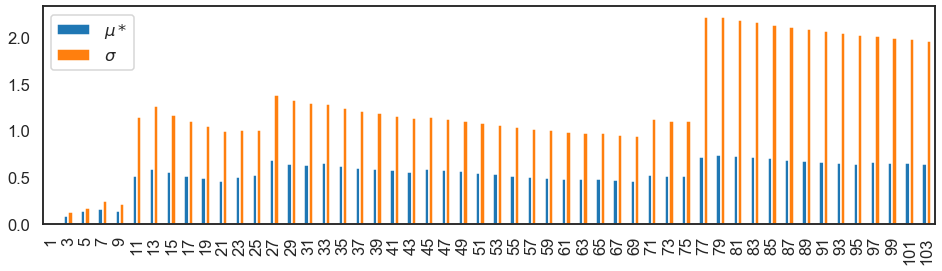

In [27]:
pd.DataFrame(data=res[::2], columns=cols, index=idx[::2]).plot(kind='bar', figsize=(16,4))